# Classification with Synethis data 


    This program create exam marks for 100 students in six subjects. The marks are 
    gievn randomly between 0 and 100. In every subject pass marks are 33 and if 
    a student fails in two or more subjects then he or she is considered fail.
    Apart from binary output - pass (1) and fail (0) the students are also given 
    divisions - 1,2 and 3 if total marks are more than 60 %, between 60 and 45 %
    and between 45 and 33 %. If the total marks are less that 33 % the diviion is 0.
    This data set can be used for binary as well as multi-class classification. 
    At present all the class values are exact, however, we can make the 
    problem challenging by adding some noise (putting wrong labels for some 
    data point) also. 


In [23]:
import numpy as np
import pandas as pd 

def get_exam_data ():
    ndata = 1000 
    subjects = ["Hindi","English","Science","Maths","History","Geograpgy"]
    np.random.seed(seed=167) 
    nsubjects = len (subjects)

    marks = np.random.randint(100, size=(ndata,nsubjects))
    df = pd.DataFrame(data=marks, columns=subjects)
    df['Total'] =  df[subjects].sum(axis=1)

    res = []
    for i in range (0, ndata):
        x = 0 
        for j in range (0, nsubjects):
            if df.iloc[i][subjects[j]] > 33:
                x+=1
        if x >=4:
            res.append (1)
        else:
            res.append (0)
    df["Result"] =  res         
        
    return df 


Input data frame: (1000, 8)
Columns: Index(['Hindi', 'English', 'Science', 'Maths', 'History', 'Geograpgy', 'Total',
       'Result'],
      dtype='object')
labels= [0, 1]
SVM Classifier
              precision    recall  f1-score   support

        Fail       0.79      0.82      0.80        67
        Pass       0.91      0.89      0.90       133

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.87      0.86      0.87       200



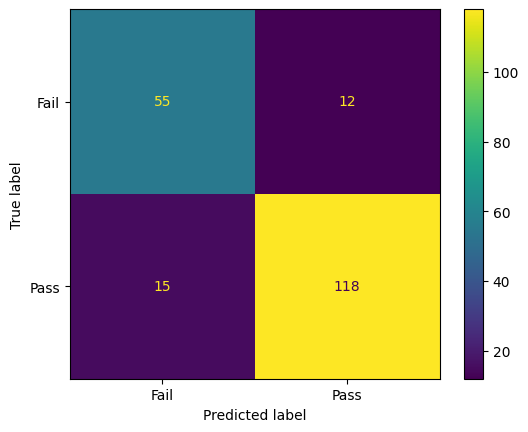

Logistic Regression Classifier
              precision    recall  f1-score   support

        Fail       0.85      0.69      0.76        67
        Pass       0.86      0.94      0.90       133

    accuracy                           0.85       200
   macro avg       0.85      0.81      0.83       200
weighted avg       0.85      0.85      0.85       200



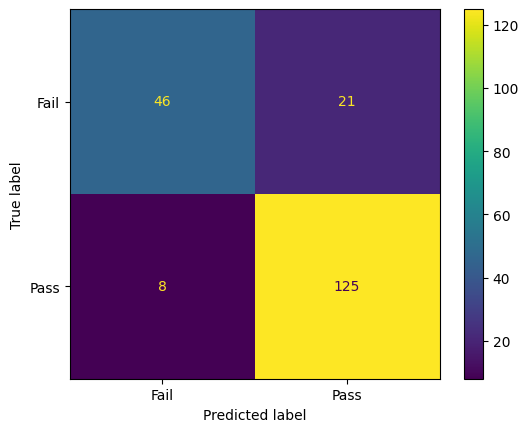

Naive Bayes  Classifier
              precision    recall  f1-score   support

        Fail       0.92      0.66      0.77        67
        Pass       0.85      0.97      0.91       133

    accuracy                           0.86       200
   macro avg       0.88      0.81      0.84       200
weighted avg       0.87      0.86      0.86       200



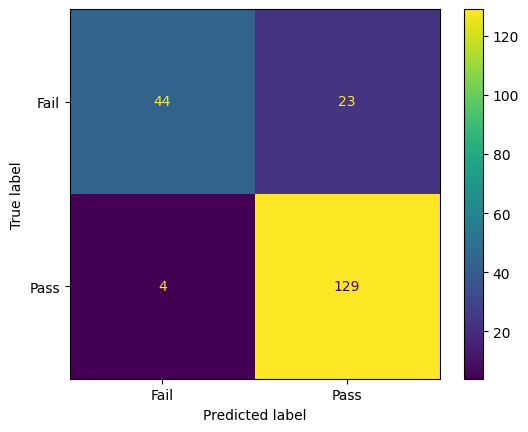

Decision Tree  Classifier
              precision    recall  f1-score   support

        Fail       0.97      0.97      0.97        67
        Pass       0.98      0.98      0.98       133

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



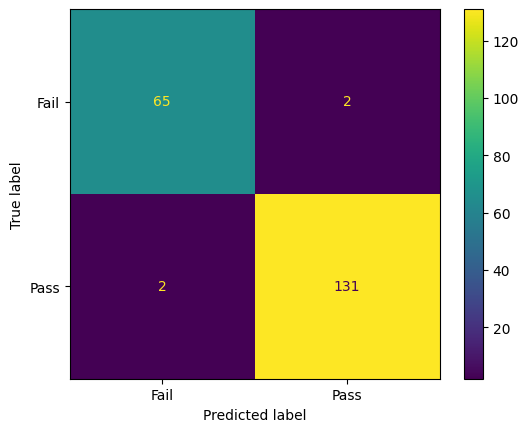

KNN  Classifier
              precision    recall  f1-score   support

        Fail       0.92      0.70      0.80        67
        Pass       0.87      0.97      0.91       133

    accuracy                           0.88       200
   macro avg       0.89      0.84      0.86       200
weighted avg       0.88      0.88      0.88       200



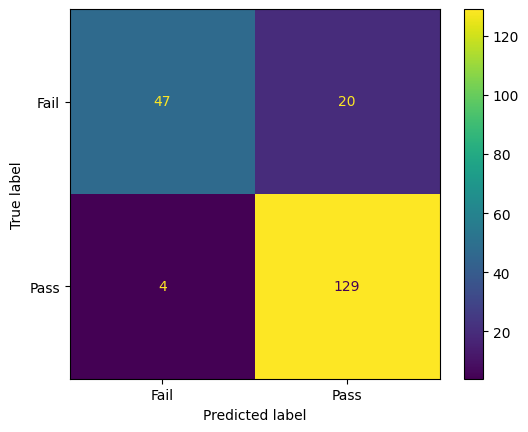

In [24]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors

# This is for Support Vector Machines 
def Support_Vector_Machine (x_train, y_train):
   print("SVM Classifier") 
   #clf = svm.LinearSVC()
   #clf = svm.SVC(kernel='rbf')
   clf = svm.SVC(kernel='poly', degree=8)
   clf.fit(x_train, y_train)
   return clf 


# This is for Logistic Regression 
def Logistic_Regression (x_train, x_test):
    print("Logistic Regression Classifier") 
    clf = LogisticRegression(C=1e5)
    clf.fit(x_train, y_train)
    return clf


# This is for Naive Bayes 
def Naive_Bayes (x_train, x_test):
   print("Naive Bayes  Classifier") 
   clf = GaussianNB()
   clf.fit(x_train, y_train)
   return clf


# This is for Decision Tree  
def Decision_Tree (x_train, y_train):
    print("Decision Tree  Classifier") 
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    clf.fit(x_train, y_train)
    return clf

# This is knn classifier 

def Nearest_Neighbours (x_train, y_train):
    print("KNN  Classifier") 
    n_neighbors = 15
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(x_train, y_train)
    return clf 


def plot_cm(cm, model_name):
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4))
    ax.set_title(model_name.__name__)
    fig.savefig(model_name.__name__+'.png')


if __name__ == "__main__":

   df = get_exam_data() 

   print("Input data frame:", df.shape)
   print("Columns:", df.columns)

   data = df.to_numpy()

   X = data[:,0:6]
   Y = data[:,7]
    
   labels = list(set(Y))
   print("labels=",labels)
   labels = ["Fail","Pass"]
    
   x_train, x_test, y_train, y_test \
      = train_test_split(X, Y, test_size=0.20, random_state=42)

   models = [Support_Vector_Machine,Logistic_Regression,Naive_Bayes,Decision_Tree,Nearest_Neighbours]

   conf_mat = [] 
   for m in models:
      print("================================================================") 
      clf = m(x_train, y_train)    
      y_hat = clf.predict(x_test)
      print(classification_report(y_test, y_hat, target_names= labels))
      cm = confusion_matrix(y_test, y_hat)
      cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels) 
      cm_display.plot()
      plt.show()
